# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
df = pd.read_csv('../data/Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?

    - annual spending on a type of product
    - channel = customer channel (hotel or retial)
    - region = customer region Lisnon, oporto or other

* Any categorical data to convert?

    - channel and region are categorical

* Any missing data to remove?

    - no nans

* Column collinearity - any high correlations?

    - even if there may be high correlations, as the product types are different i would not remove them

* Descriptive statistics - any outliers to remove?
    
    - As we talk of the pareto principle, I will not remove the outliers, as that is the whole point of the pareto pricniple. 

* Column-wise data distribution - is the distribution skewed?

    - all distributions look more or less the same, left skewed

* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.dtypes # all int - seems ok
df.isna().sum()/len(df)*100 # no NANs
df.shape # (440, 8)

(440, 8)

In [5]:
# Your observations here
df.dtypes # varied - to see later
df.isna().sum()/len(df)*100 #CONTENT_LENGTH  45% na #DNS_QUERY_TIMES 1 na
df.shape # (1781, 21)
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

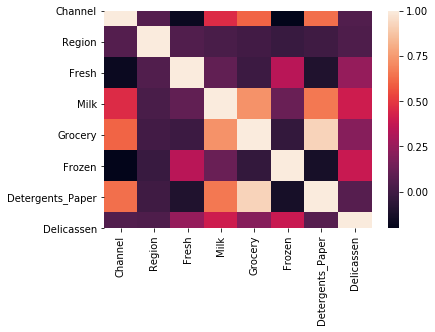

In [6]:
sns.heatmap(df.corr())

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [7]:
# Your code here
df.dtypes # correct types
df.info() # no nans
df.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


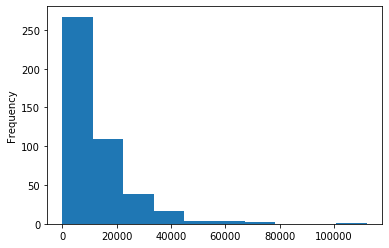

In [8]:
df.Fresh.plot.hist()
# all distributions look more or less the same. As we talk of the pareto principle, I will not remove the outliers, as that is the whole point of the pareto pricniple. 

### Removing outliers
at the end of the exercise, we realise that the kmeans does not work well with outliers,  therefore we remove them


In [9]:
from scipy import stats
df_out = df.copy()
cols = df_out.columns

In [10]:
z = np.abs(stats.zscore(df_out))
threshold = 3
print(np.where(z > threshold))

(array([ 23,  23,  39,  47,  47,  47,  56,  56,  61,  61,  61,  65,  65,
        71,  85,  85,  85,  86,  86,  87,  92,  93, 103, 103, 125, 181,
       181, 183, 183, 183, 196, 211, 211, 211, 216, 251, 258, 259, 284,
       325, 333, 333, 413], dtype=int64), array([3, 7, 2, 3, 4, 6, 3, 6, 3, 4, 6, 4, 6, 7, 3, 4, 6, 3, 6, 7, 6, 5,
       2, 5, 2, 2, 3, 3, 5, 7, 5, 3, 4, 6, 4, 6, 2, 2, 2, 5, 4, 6, 5],
      dtype=int64))


In [11]:
lst = [23,  23,  23,  23,  39,  39,  47,  47,  47,  47,  47,  47,  56,
        56,  56,  56,  61,  61,  61,  61,  61,  61,  65,  65,  65,  65,
        71,  71,  85,  85,  85,  85,  85,  85,  86,  86,  86,  86,  87,
        87,  92,  92,  93,  93, 103, 103, 103, 103, 125, 125, 181, 181,
       181, 181, 183, 183, 183, 183, 183, 183, 196, 196, 211, 211, 211,
       211, 211, 211, 216, 216, 251, 251, 258, 258, 259, 259, 282, 284,
       284, 312, 325, 325, 333, 333, 333, 333, 413, 413]
array = list(set(lst))
print(array)

[258, 259, 23, 282, 284, 413, 39, 47, 181, 183, 56, 312, 61, 65, 196, 325, 71, 333, 211, 85, 86, 87, 216, 92, 93, 103, 251, 125]


In [13]:
df_out.drop(array, axis=0, inplace=True)

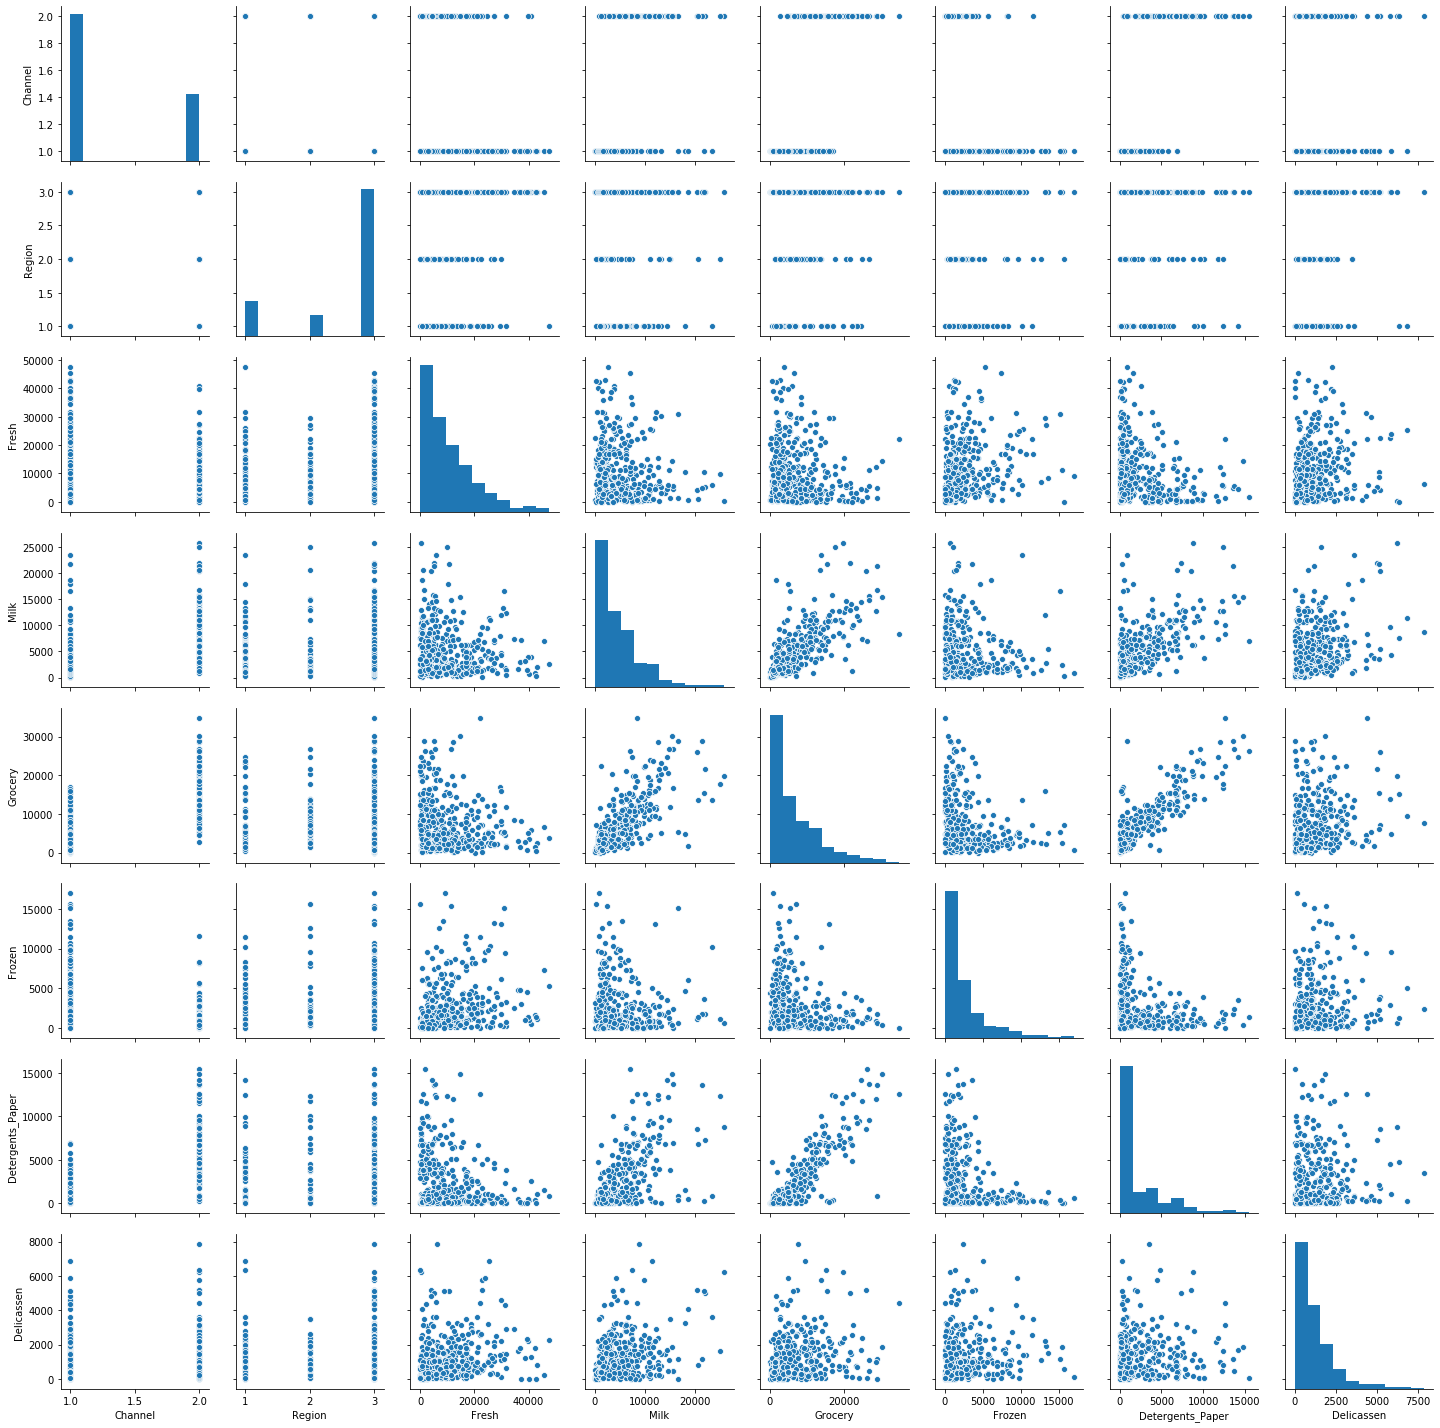

In [15]:
sns.pairplot(df_out)

###  Your comment here
all have more or less the same distirbution, some extreme values but we are going to leave them in for now, if anything, i wil do the analysis twice and compare, with and without outliers

may have future problems with value range

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [16]:
# Your import here:
from sklearn.preprocessing import StandardScaler

In [17]:
# Your code here:
scaler = StandardScaler()
scaler.fit(df_out)
customer_scale = pd.DataFrame(scaler.transform(df_out), columns=df_out.columns)


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

Count the values in `labels`.

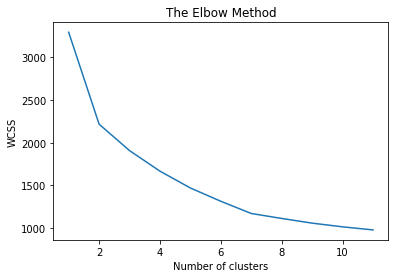

In [19]:
# Your code here:
# find best number of clusters - 6?
wcss = []

for i in range(1, 12):

    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 42)

    kmeans.fit(customer_scale)

    wcss.append (kmeans.inertia_)

plt.plot(range(1, 12), wcss)

plt.title('The Elbow Method')

plt.xlabel('Number of clusters')

plt.ylabel('WCSS')

plt.show()

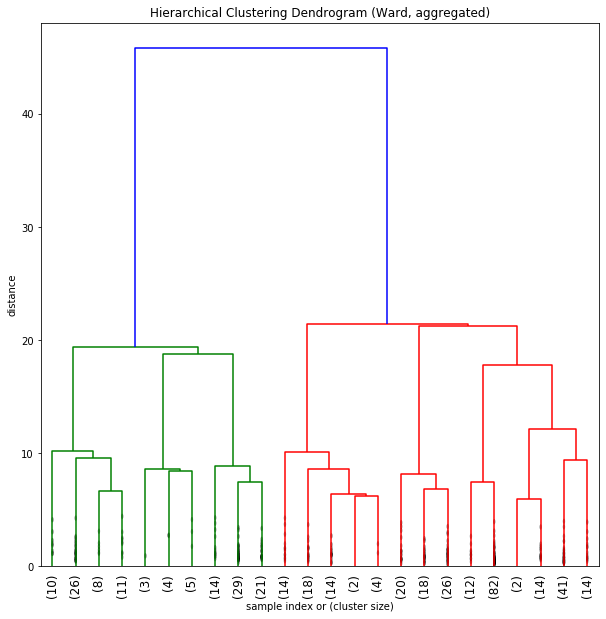

In [18]:
# trying another function to define my n for the kmeans
# looking at this, n=4 might be more accurate
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(customer_scale, 'ward')
figure = plt.figure(figsize=(10, 10))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggregated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

In [20]:
modelK = KMeans (n_clusters=6)
kmeans = modelK.fit(customer_scale)
kmeans= modelK.inertia_

customer_scale_K = customer_scale
customer_scale_K["labels_k"] = modelK.labels_
customer_scale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_k
0,1.481148,0.586602,0.210567,1.047909,0.119791,-0.799642,0.106493,0.080321,1
1,1.481148,0.586602,-0.371691,1.081677,0.431729,-0.268536,0.304350,0.440031,1
2,1.481148,0.586602,-0.444733,0.861970,0.138908,-0.047928,0.375630,5.423402,1
3,-0.675152,0.586602,0.272403,-0.807099,-0.399328,1.324096,-0.586168,0.449886,4
4,1.481148,0.586602,1.242488,0.116897,0.063372,0.470140,-0.180224,3.239687,1


In [21]:
customer_scale_K["labels_k"].value_counts()

5    133
1     84
2     69
0     44
3     43
4     39
Name: labels_k, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [22]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5).fit(customer_scale)
customer_scale_K["labels_DBSCAN"] = db.labels_
customer_scale_K.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_k,labels_DBSCAN
0,1.481148,0.586602,0.210567,1.047909,0.119791,-0.799642,0.106493,0.080321,1,-1
1,1.481148,0.586602,-0.371691,1.081677,0.431729,-0.268536,0.304350,0.440031,1,-1
2,1.481148,0.586602,-0.444733,0.861970,0.138908,-0.047928,0.375630,5.423402,1,-1
3,-0.675152,0.586602,0.272403,-0.807099,-0.399328,1.324096,-0.586168,0.449886,4,-1
4,1.481148,0.586602,1.242488,0.116897,0.063372,0.470140,-0.180224,3.239687,1,-1


Count the values in `labels_DBSCAN`.

In [23]:
# Your code here
customer_scale_K["labels_DBSCAN"].value_counts()

-1    341
 0     71
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

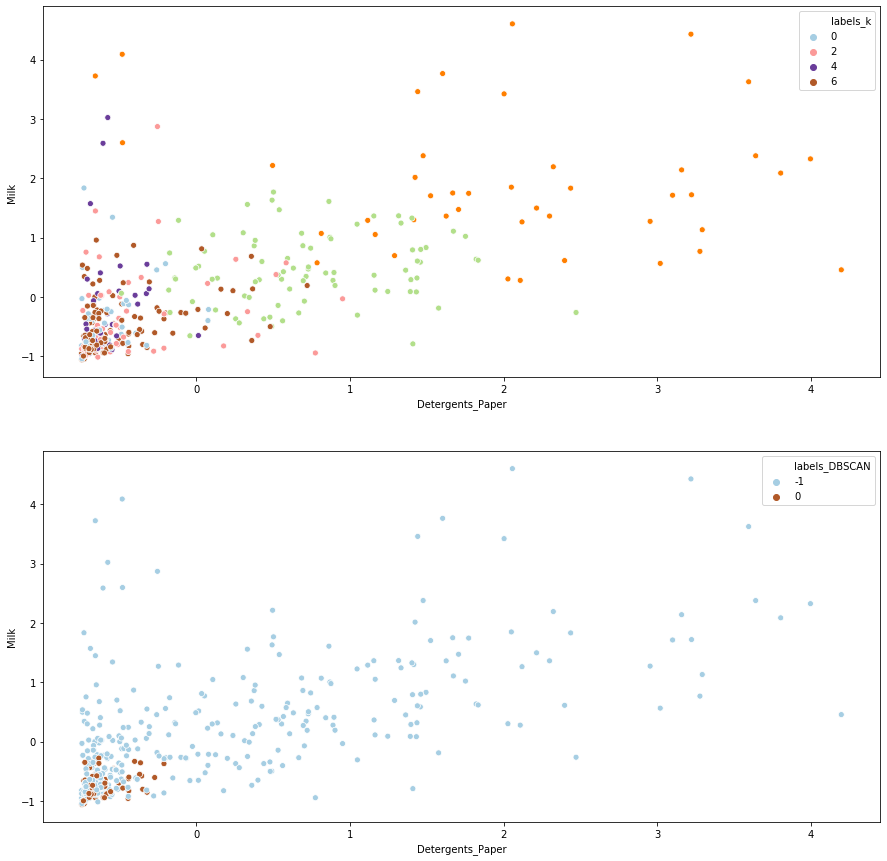

In [24]:
# Your code here:
fig, ax = plt.subplots(2,1, figsize=(15,15))
x = customer_scale_K.Detergents_Paper
y = customer_scale_K.Milk
c1 = customer_scale_K.labels_k
c2 = customer_scale_K.labels_DBSCAN
color = sns.color_palette("Paired")
sns.scatterplot(x=x, y=y, hue=c1, ax=ax[0], palette="Paired")
sns.scatterplot(x=x, y=y, hue=c2, ax=ax[1], palette="Paired")


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

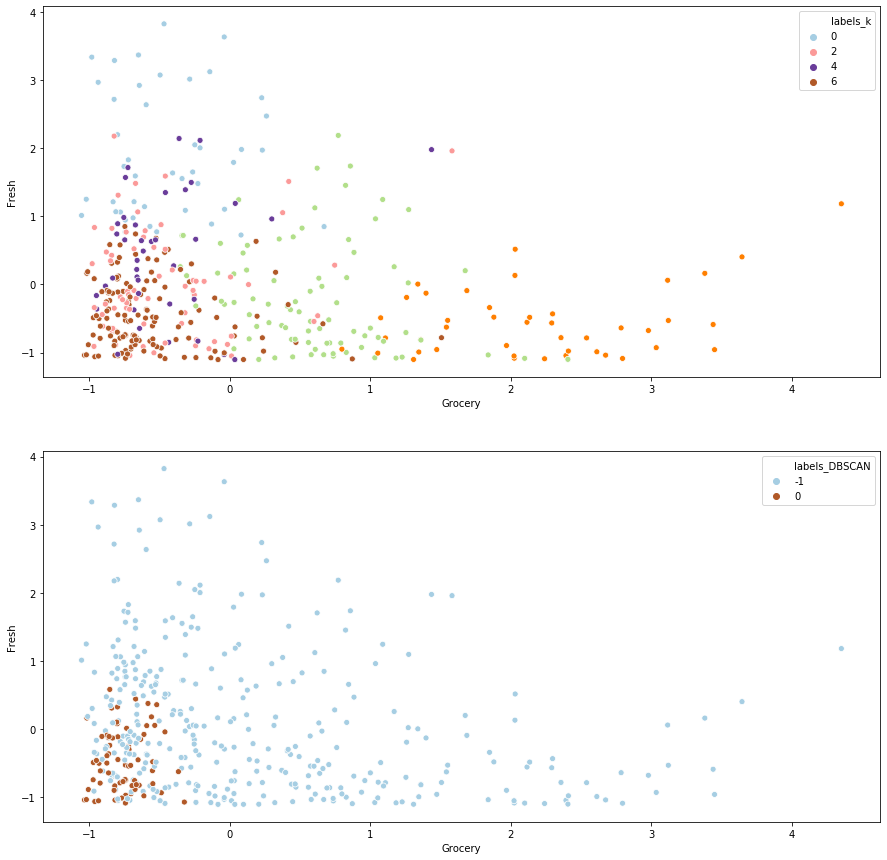

In [25]:
# Your code here:
fig, ax = plt.subplots(2,1, figsize=(15,15))
x = customer_scale_K.Grocery
y = customer_scale_K.Fresh
c1 = customer_scale_K.labels_k
c2 = customer_scale_K.labels_DBSCAN
color = sns.color_palette("Paired")
sns.scatterplot(x=x, y=y, hue=c1, ax=ax[0], palette="Paired")
sns.scatterplot(x=x, y=y, hue=c2, ax=ax[1], palette="Paired")


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

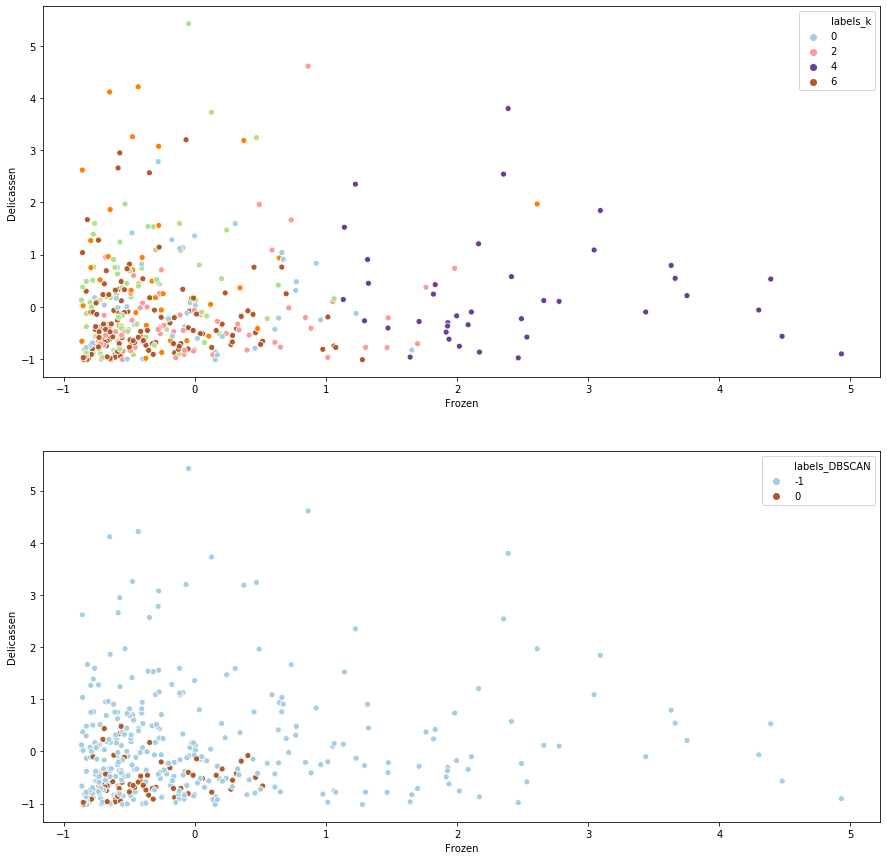

In [26]:
# Your code here:
fig, ax = plt.subplots(2,1, figsize=(15,15))
x = customer_scale_K.Frozen
y = customer_scale_K.Delicassen
c1 = customer_scale_K.labels_k
c2 = customer_scale_K.labels_DBSCAN
color = sns.color_palette("Paired")
sns.scatterplot(x=x, y=y, hue=c1, ax=ax[0], palette="Paired")
sns.scatterplot(x=x, y=y, hue=c2, ax=ax[1], palette="Paired")

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [27]:
# Your code here:
kmeans = customer_scale_K.groupby("labels_k").mean()
kmeans

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels_k,,,,,,,,,
0,-0.577138,0.409417,1.897152,-0.379137,-0.442681,-0.006289,-0.548487,0.075189,-1.000000
1,1.404137,0.385511,-0.198540,0.443714,0.592525,-0.449300,0.713631,0.150441,-1.000000
2,-0.550149,-1.767302,-0.009770,-0.399514,-0.460408,0.031465,-0.456876,-0.212521,-1.000000
3,1.330708,-0.289707,-0.563098,1.909949,2.191971,-0.296071,2.050450,0.593949,-1.000000
4,-0.564573,0.320068,0.440296,-0.172852,-0.472498,2.435765,-0.577783,0.256091,-1.000000
5,-0.675152,0.537754,-0.444222,-0.514361,-0.559048,-0.349000,-0.525737,-0.276757,-0.466165


In [28]:
dbscan = customer_scale_K.groupby("labels_DBSCAN").mean()
dbscan

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_k
labels_DBSCAN,,,,,,,,,
-1,0.140574,-0.122137,0.095501,0.153193,0.156945,0.079706,0.128450,0.115358,2.395894
0,-0.675152,0.586602,-0.458673,-0.735759,-0.753778,-0.382814,-0.616921,-0.554045,5.000000


Which algorithm appears to perform better?

In [29]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here